<a href="https://colab.research.google.com/github/Gauravhulmukh/All_ml_algorithm_from_scratch/blob/master/Linear%20Regression/Multiple_linear_regression_stochastic_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multiple Linear Regression Stochastic Gradient Descent**<br>

For a quick simple explanation:

In both gradient descent (GD) and stochastic gradient descent (SGD), you update a set of parameters in an iterative manner to minimize an error function.

While in GD, you have to run through ALL the samples in your training set to do a single update for a parameter in a particular iteration, in SGD, on the other hand, you use ONLY ONE or SUBSET of training sample from your training set to do the update for a parameter in a particular iteration. If you use SUBSET, it is called Minibatch Stochastic gradient Descent.

Thus, if the number of training samples are large, in fact very large, then using gradient descent may take too long because in every iteration when you are updating the values of the parameters, you are running through the complete training set. On the other hand, using SGD will be faster because you use only one training sample and it starts improving itself right away from the first sample.

SGD often converges much faster compared to GD but the error function is not as well minimized as in the case of GD. Often in most cases, the close approximation that you get in SGD for the parameter values are enough because they reach the optimal values and keep oscillating there.

Zip Function = Used to combine two list.
Enumerate function = used to indexing the list.
Things need to be Remember:
1. Shuffle the training examples
2. Calculate Batch cost 
3. Avg. of batch cost will be get stored in Cost_history(array)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train_data = pd.read_csv('train_dataset.csv')
test_data = pd.read_csv('test_dataset.csv')
x = train_data[['a','b']].values
y = train_data['y'].values
x_test = test_data[['a','b']].values
y_test = test_data['y'].values

In [0]:
# Hypothesis structure(Linear Representation) y = theta0 + (theta1*x)
def hypothesis(theta_coeff, x):
    """
    theta_coeff(array): coefficients of function (1 x num_of_coeff)
    x: input data/variable (num_of_samples x 1)
    
    Returns:
    Predicted value for each example-row in inputs (1 x num_of_inputs)
    """
    return x.dot(theta_coeff)

def cost_function_mse(theta_coeff, x, y):
    """
    theta_coeff(array): coefficients of function (1 x num_of_coeff)
    x: input data/variable (num_of_samples x 1)
    y: output data/variable (num_of_samples x 1)
    
    Returns:
    Computes cost of using theta_coeff as coefficients for Linear Representation wrt to training data
    """
    predicted_y = hypothesis(theta_coeff, x)
    return np.sum((predicted_y - y)**2) / (2*x.shape[0])

def compute_gradient(theta_coeff, x, y):
    """
    theta_coeff(array): coefficients of function (1 x num_of_coeff)
    x: input data/variable (num_of_samples x 1)
    y: output data/variable (num_of_samples x 1)
    
    Returns:
    Array of computed gradients for each of the coefficients (1 x num_of_coefficients)
    """
    predicted_y = hypothesis(theta_coeff, x)
    # coeff_gradients = np.sum(((predicted_y - y)**2) * x.T, axis=1) / (x.shape[0])
    coeff_gradients = np.sum((predicted_y - y) * x.T, axis=1) / (x.shape[0])
    return coeff_gradients

In [0]:
def stochastic_gradient_descent(x,y,iterations,learning_rate,batch_size):
  '''
  x : Input data/variables (num_of_samples X 1)
  y : Output data/variables (num_of_samples X 1)
  iterations(int) : Number_of_iterations/epochs
  learning_rate(int) : Alpha / learning rate which controls the descent

  Return:
  theta_coeff(array) : Best set of coefficients for the linear model(1 X num_of_coefficient)
  cost_history(array) : Cost history wrt coefficients computed while performing the Descent.
  '''
  cost_history = []
  theta_coeff = np.array([0] * x.shape[1])
  #shuffle the training examples
  #shuffles ensure that each data point create independent change on the model, without being biased by the same points before them
  #shuffling mini-batchs make the gradients more variable, which can help convergence because it increases the likelihood of hitting a good direction"
  shuffled_indices = np.arange(x.shape[0])
  np.random.shuffle(shuffled_indices)
  x = x[shuffled_indices]
  y = y[shuffled_indices]
  for iteration in range(iterations):
        batch_cost = []
        for training_example_idx, (training_example_x, training_example_y) in enumerate(zip(x,y)):
            # Predict -> compute cost -> compute gradient ... wrt to each example
            example_x = training_example_x.reshape([-1, x.shape[1]])
            coeff_gradients = compute_gradient(theta_coeff,example_x,training_example_y)
            # Alter old theta_coeff using movement suggested by new coeff_gradients
            theta_coeff = theta_coeff - (learning_rate * coeff_gradients)
            # Compute the cost using theta_coeff as coefficients of linear function
            cost = cost_function_mse(theta_coeff, x, y)
            batch_cost.append(cost)
            # Append the cost to cost_history by averaging the accumulated costs in batch_cost_container
            if len(batch_cost) % batch_size == 0:
                cost_history.append(np.mean(batch_cost))
                batch_cost = []
  return theta_coeff, cost_history

In [0]:
## Prepare data
# Learning rate
alpha = 0.0001
# Bias variable 
bias_variable = np.ones(len(x))
# Plug input along with bias_variable
x_train = np.column_stack([bias_variable, x])

In [0]:
best_theta_coeff, cost_history = stochastic_gradient_descent(x_train, y, 150, alpha, 10)

In [16]:
cost_history[-1]

235.52104007912084

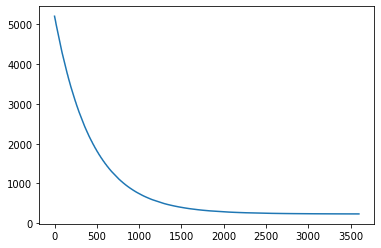

In [17]:
plt.plot(cost_history)

In [0]:
def get_predictions(theta_coeff, x_input):
    # Bias variable 
    bias_variable = np.ones(len(x_input))
    # Plug input along with bias_variable
    new_x_input = np.column_stack([bias_variable, x_input])
    # Compute output values with new coefficients
    preds = hypothesis(theta_coeff, new_x_input)
    return preds

In [0]:
# RMSE
def rmse(y, y_pred):
    rmse = np.sqrt(np.sum((y - y_pred)**2) / len(y))
    return rmse

In [0]:
#R2 Score
# How much(%) of the total variation in y is explained by variation in x(fitted line)
def r2_score(y, y_pred):  
    mean_y = np.mean(y)
    SE_total_variation = np.sum((y - mean_y)**2) # Unexplained max possible variation in y wrt->Mean
    SE_line_variation = np.sum((y - y_pred)**2) # Unexplained variation in y wrt -> fitted line
    r2 = 1 - (SE_line_variation / SE_total_variation) # Expalined = 1 - Unexplained
    return r2

In [0]:
y_pred_train = get_predictions(best_theta_coeff, x)#Training
y_pred_test = get_predictions(best_theta_coeff, x_test)#Testing

In [23]:
print("Training set evaluation")
print(f"RMSE = {rmse(y, y_pred_train)}")
print(f"R2_score = {r2_score(y, y_pred_train)}")

Training set evaluation
RMSE = 21.703504248650074
R2_score = 0.9541415628392439


In [26]:
print("Testing set evaluation")
print(f"RMSE = {rmse(test_data['y'].values, y_pred_test)}")
print(f"R2_score = {r2_score(test_data['y'].values, y_pred_test)}")

Testing set evaluation
RMSE = 22.883321194027097
R2_score = 0.9536679673246458
